In [1]:
from vampires_calibration.csv_tools import read_csv,match_fits_tags
from vampires_calibration.on_sky import write_fits_info_to_csv_psf,fit_CHARIS_Mueller_matrix_by_bin_m3
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from vampires_calibration.utils import process_errors,generate_system_mueller_matrix,process_dataset,process_model
from vampires_calibration.fitting import model
from vampires_calibration.plotting import plot_data_and_model
from vampires_calibration.constants import wavelength_bins
from pyMuellerMat.physical_models.charis_physical_models import HWP_retardance, IMR_retardance,M3_diattenuation,M3_retardance
import pandas as pd
from pathlib import Path

In [ ]:
# try one star
# for bin in range(22):
#     df = pd.read_csv(f'datacsvs/onsky_csvs/unpol_standards_2_stars/bin{bin}.csv')
#     # remove all stars with tag 343631 in filepath
#     df = df[~df['filepath'].str.contains('343631')]
#     df.to_csv(f'datacsvs/onsky_csvs/unpol_standards_1_star/bin{bin}.csv',index=False)

In [ ]:
# try

In [25]:
# Plotting data with original model

filepath = Path('datacsvs/onsky_csvs/HD25532/bin2.csv')

# Read in data

interleaved_values, interleaved_stds, configuration_list = read_csv(filepath,mode='m3')
print("Interleaved Values")
print("Length: ", len(interleaved_values))
print(interleaved_values[0 : 10])
print("Interleaved Stds")
print("Length: ", len(interleaved_stds))
print(interleaved_stds[0 : 10])
print("Configuration List")
print("Length: ", len(configuration_list))
print(configuration_list[0 : 10])
print(interleaved_stds[0])

Interleaved Values
Length:  204
[ -36972.81173553 2722039.20646963 -119195.52516762 2658847.05043029
  -70803.16784674 2286948.84497173  -72709.92374125 2081075.28162617
  -45139.95671789 1959610.06371488]
Interleaved Stds
Length:  204
[2772.8485286  2772.8485286  2771.69865962 2771.69865962 2124.6979211
 2124.6979211  1826.63420482 1826.63420482 1716.66549618 1716.66549618]
Configuration List
Length:  102
[{'hwp': {'theta': 22.5}, 'image_rotator': {'theta': 85.50399}, 'altitude_rot': {'pa': 41.99246511}, 'parang_rot': {'pa': 83.87981766548525}}, {'hwp': {'theta': 67.5}, 'image_rotator': {'theta': 85.43126}, 'altitude_rot': {'pa': 41.85761247}, 'parang_rot': {'pa': 83.83396670474883}}, {'hwp': {'theta': 0.0}, 'image_rotator': {'theta': 85.34017}, 'altitude_rot': {'pa': 41.6499689}, 'parang_rot': {'pa': 83.76331306430977}}, {'hwp': {'theta': 45.0}, 'image_rotator': {'theta': 85.31183}, 'altitude_rot': {'pa': 41.59359128}, 'parang_rot': {'pa': 83.74407858219183}}, {'hwp': {'theta': 22.5}

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.3426e+04                                    1.27e+06    
       1              2         3.0563e+04      2.86e+03       2.82e-02       9.53e+03    
       2              3         3.0521e+04      4.17e+01       6.54e-02       9.45e+03    
       3              4         3.0439e+04      8.24e+01       1.31e-01       9.27e+03    
       4              5         3.0277e+04      1.61e+02       2.60e-01       1.23e+04    
       5              6         2.9968e+04      3.10e+02       5.15e-01       2.36e+04    
       6              7         2.9401e+04      5.67e+02       1.01e+00       4.29e+04    
       7              8         2.8469e+04      9.32e+02       1.95e+00       6.98e+04    
       8              9         2.7335e+04      1.13e+03       3.60e+00       8.38e+04    
       9             10         2.7021e+04      3.13e+02       2.28e+00       2.21e+04    

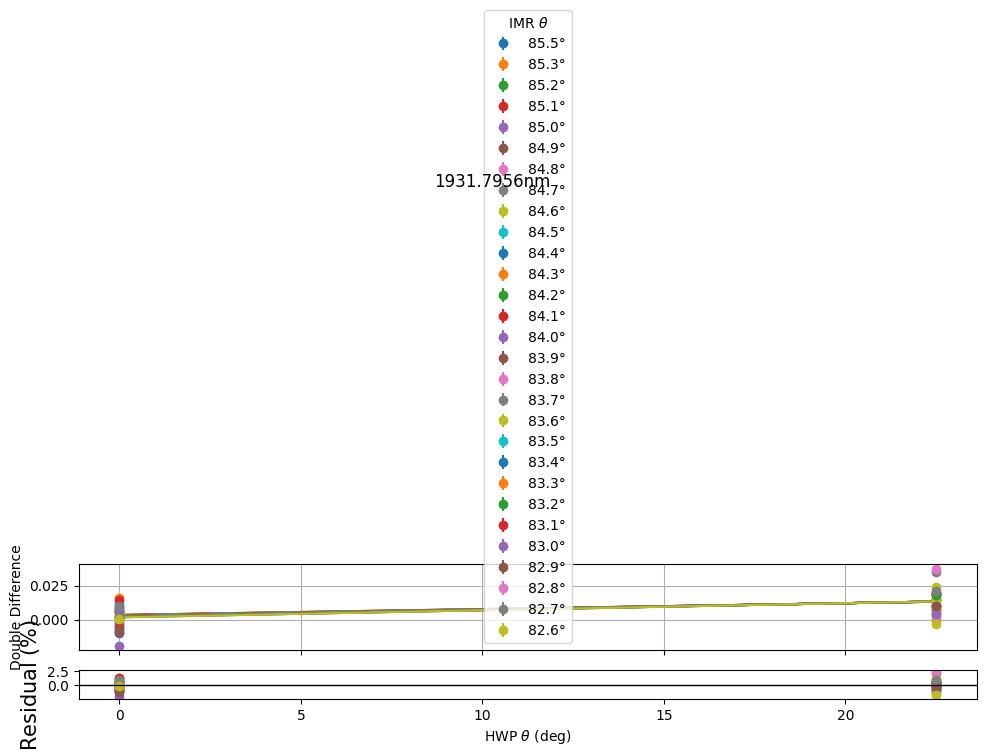

Updated Mueller Matrix:
[[ 0.49327823  0.40918272 -0.25906054 -0.07229606]
 [-0.48966271 -0.41220083  0.26098231  0.07281556]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -2.202872724970863 2.413535323776008
Error: [1.36423811e-03 2.89443139e+00]
s_res: 0.9112253544251655


/var/folders/2v/qmxm7kj51fg6kf7g36xrbysr0000gn/T/ipykernel_87816/2050289960.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


In [26]:
# fit diattenuation
# test minimization

# Test fitting with the wavelength bin we plotted earlier

error,fig2, ax2,sres = fit_CHARIS_Mueller_matrix_by_bin_m3(filepath, 15, 
    Path('/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/unpol_imr_diat_fit/test.json'),
    )
ax2.tick_params(
    axis='x',
    direction='in',
    top=True,
    which='both',  
)
ax2.tick_params(
    axis='y',
    direction='in',
    right=True,
    which='both',
)
ax2.minorticks_on()
fig2.suptitle('')
fig2.show()
#fig2.savefig('/Users/thomasmcintosh/Desktop/CHARIS-REU/overleaf_plots/naive_model_single_diff_vs_hwp_1329.png',bbox_inches='tight', dpi=600)



   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.1845e+04                                    1.13e+06    
       1              2         2.9410e+04      2.44e+03       4.76e-02       5.77e+03    
       2              3         2.9385e+04      2.48e+01       1.00e-01       3.60e+03    
       3              4         2.9339e+04      4.65e+01       2.00e-01       3.27e+03    
       4              5         2.9258e+04      8.13e+01       3.97e-01       4.68e+03    
       5              6         2.9140e+04      1.17e+02       7.83e-01       6.77e+03    
       6              7         2.9073e+04      6.73e+01       1.10e+00       3.95e+03    
       7              8         2.9072e+04      4.55e-01       9.40e-02       2.53e+01    
       8              9         2.9072e+04      2.00e-05       6.19e-04       2.09e-02    
`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 3.1845e+04

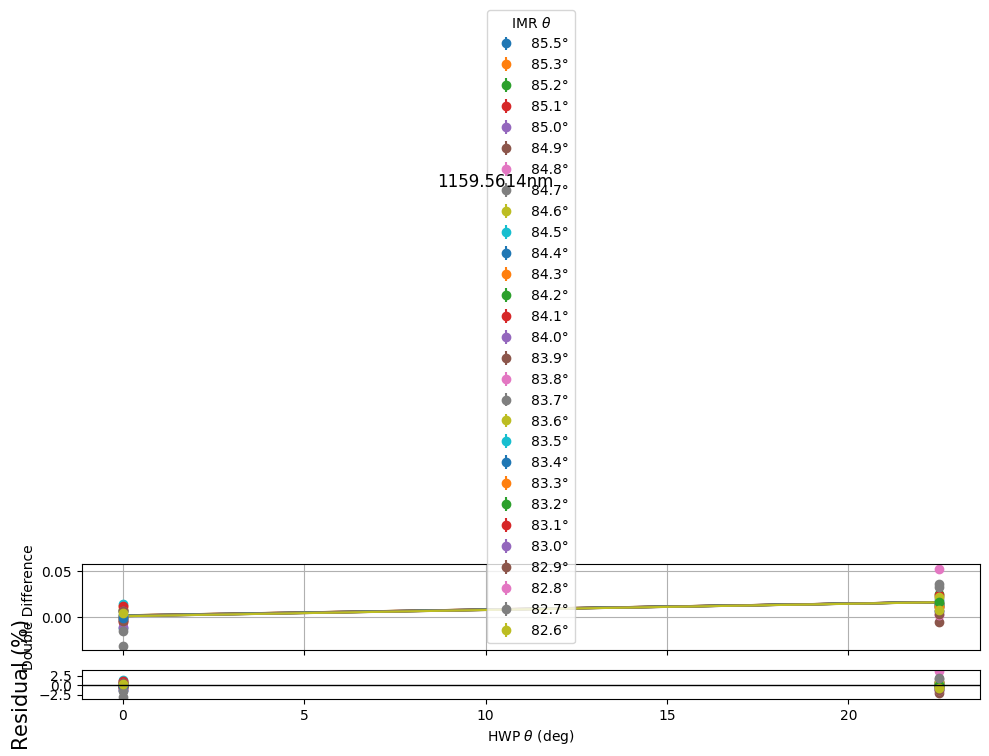

Updated Mueller Matrix:
[[ 0.49179375  0.45539711 -0.12307694  0.13902027]
 [-0.49179375 -0.45539711  0.12307694 -0.13902027]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -3.239697716018441 3.6210738117491115
Error: [1.46583655e-03 2.47476701e+00]
s_res: 1.095429755728108
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7677e+04                                    3.97e+05    
       1              2         2.7374e+04      3.03e+02       4.85e-02       2.09e+03    
       2              3         2.7360e+04      1.33e+01       9.74e-02       1.99e+03    
       3              4         2.7335e+04      2.48e+01       1.94e-01       1.78e+03    
       4              5         2.7293e+04      4.20e+01       3.86e-01       2.96e+03    
       5              6         2.7239e+04      5.48e+01       7.61e-01       3.87e+03    
       

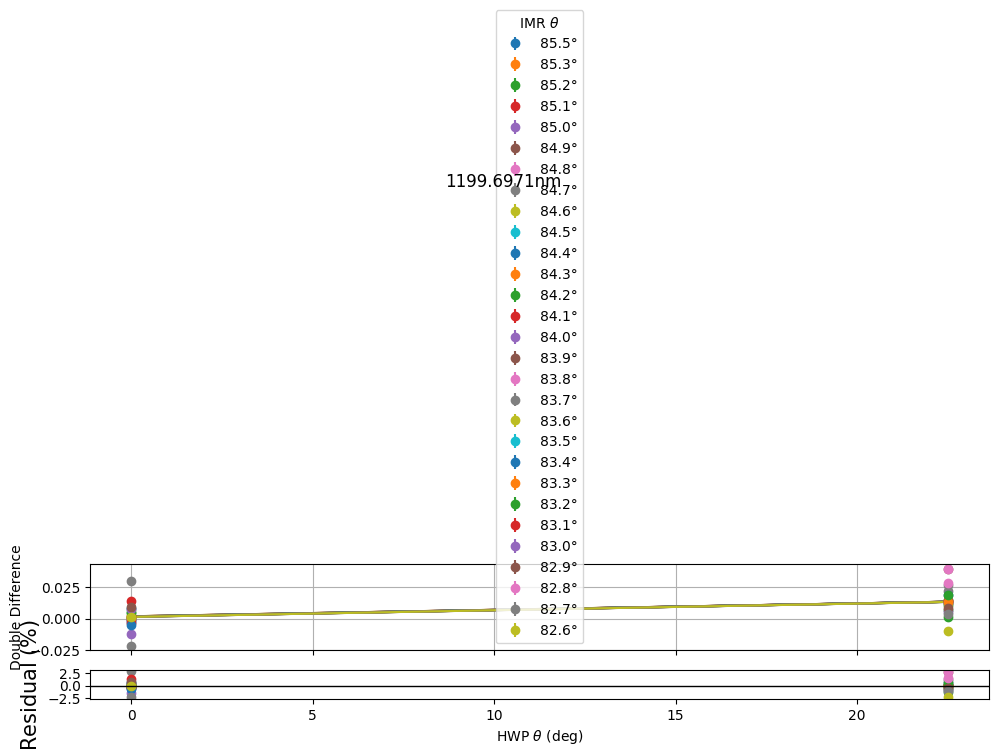

Updated Mueller Matrix:
[[ 0.4932992   0.4631868  -0.10427607  0.11852388]
 [-0.48934994 -0.46692769  0.10513383 -0.11945482]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -2.3155093808901475 2.80739451721178
Error: [1.41309543e-03 2.89296312e+00]
s_res: 1.0093283784389737
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7554e+04                                    5.06e+05    
       1              2         2.7074e+04      4.80e+02       4.69e-02       2.88e+03    
       2              3         2.7056e+04      1.79e+01       9.47e-02       2.77e+03    
       3              4         2.7022e+04      3.40e+01       1.89e-01       2.55e+03    
       4              5         2.6961e+04      6.07e+01       3.75e-01       4.27e+03    
       5              6         2.6868e+04      9.29e+01       7.40e-01       6.54e+03    
       

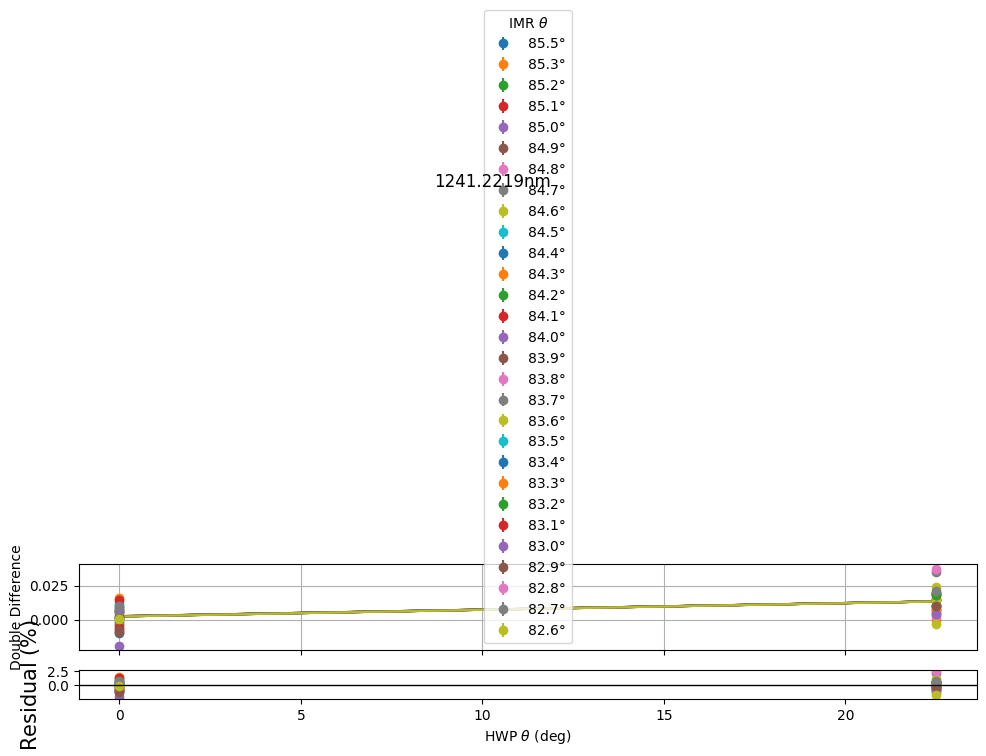

Updated Mueller Matrix:
[[ 0.4932671   0.47265875 -0.0869154   0.10324596]
 [-0.49154886 -0.47431117  0.08722917 -0.10359722]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -2.1884487081951725 2.418726382474997
Error: [1.38902787e-03 2.84038796e+00]
s_res: 0.9052660478727239
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.1446e+04                                    1.08e+06    
       1              2         3.9174e+04      2.27e+03       4.34e-02       4.89e+03    
       2              3         3.9165e+04      9.04e+00       9.20e-02       1.40e+03    
       3              4         3.9149e+04      1.59e+01       1.84e-01       1.16e+03    
       4              5         3.9126e+04      2.33e+01       3.65e-01       1.44e+03    
       5              6         3.9111e+04      1.46e+01       5.72e-01       8.97e+02    
      

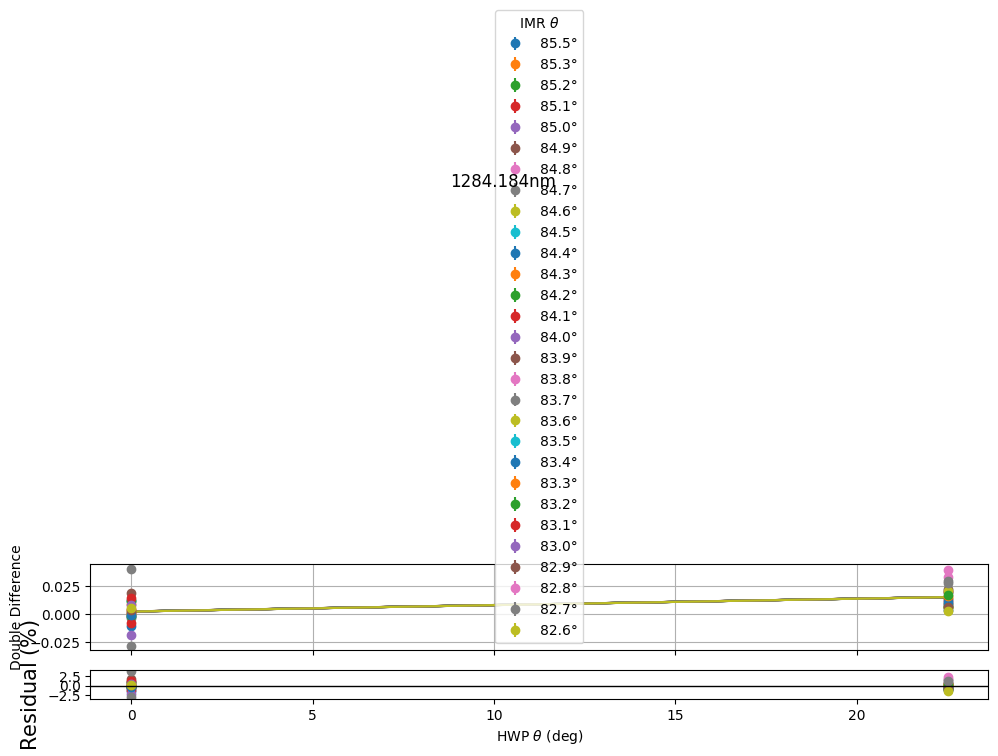

Updated Mueller Matrix:
[[ 0.49230235  0.47459494 -0.07474134  0.07294074]
 [-0.48594949 -0.48079829  0.07575303 -0.07386485]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -3.1072263493369943 3.849339232422267
Error: [1.72027264e-03 3.08324068e+00]
s_res: 1.1714356036241766
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.0867e+04                                    6.32e+04    
       1              2         4.0848e+04      1.91e+01       4.48e-02       3.59e+03    
       2              3         4.0827e+04      2.13e+01       8.95e-02       3.51e+03    
       3              4         4.0786e+04      4.15e+01       1.78e-01       3.49e+03    
       4              5         4.0707e+04      7.88e+01       3.55e-01       6.61e+03    
       5              6         4.0566e+04      1.41e+02       7.01e-01       1.18e+04    
      

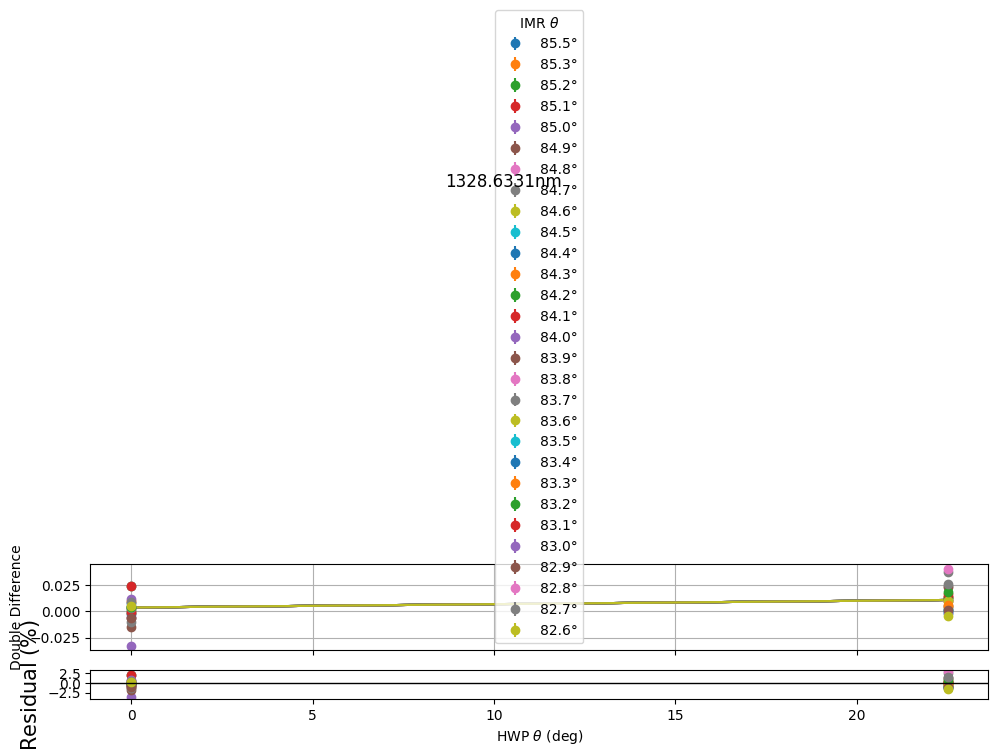

Updated Mueller Matrix:
[[ 0.49445529  0.47822741 -0.07014962  0.02921405]
 [-0.48422693 -0.48831758  0.07171297 -0.02981718]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -3.6986379608213236 3.004407236321109
Error: [1.80891736e-03 4.34659772e+00]
s_res: 1.2163416951722357
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.4127e+04                                    5.19e+04    
       1              2         8.4091e+04      3.61e+01       4.35e-02       6.38e+03    
       2              3         8.4054e+04      3.72e+01       8.70e-02       6.34e+03    
       3              4         8.3980e+04      7.41e+01       1.73e-01       6.26e+03    
       4              5         8.3832e+04      1.47e+02       3.45e-01       1.21e+04    
       5              6         8.3542e+04      2.90e+02       6.81e-01       2.36e+04    
      

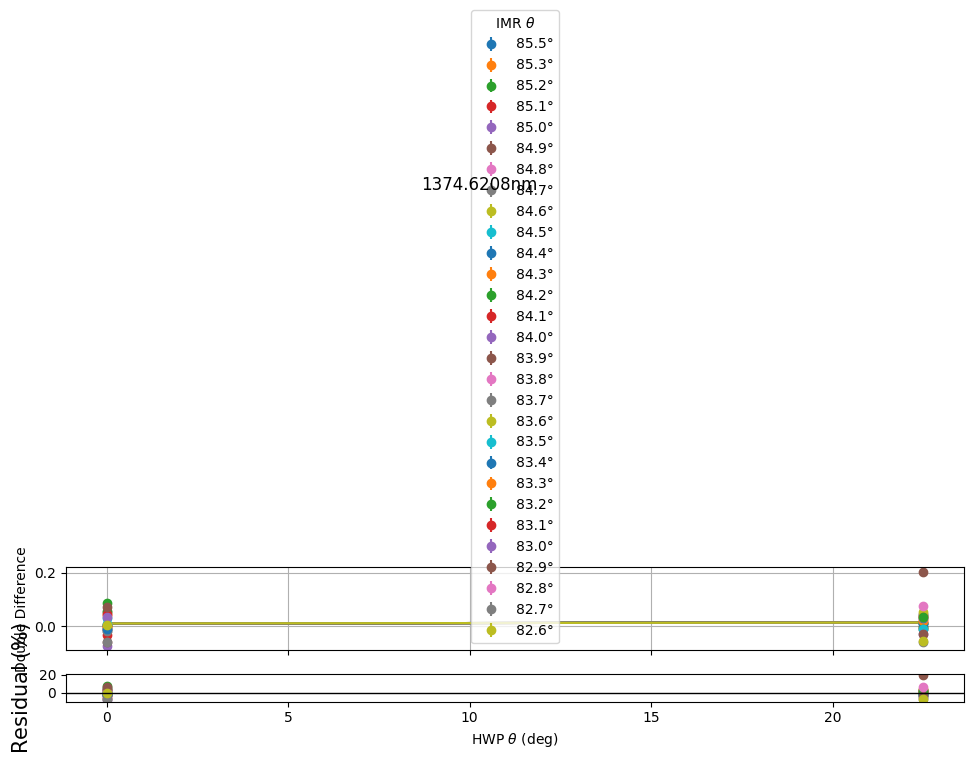

Updated Mueller Matrix:
[[ 0.49321256  0.48017781 -0.08217142 -0.01914156]
 [-0.4875333  -0.48575131  0.08324057  0.01935847]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -8.580920089556052 19.11653468540167
Error: [4.48002235e-03 7.65884085e+00]
s_res: 4.584976529106906
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         4.5718e+04                                    2.32e+05    
       1              2         4.5568e+04      1.50e+02       4.21e-02       4.27e+02    
       2              3         4.5565e+04      2.30e+00       8.45e-02       3.85e+02    
       3              4         4.5561e+04      3.91e+00       1.69e-01       3.20e+02    
       4              5         4.5556e+04      5.09e+00       3.35e-01       4.21e+02    
       5              6         4.5555e+04      1.53e+00       3.04e-01       1.30e+02    
       6

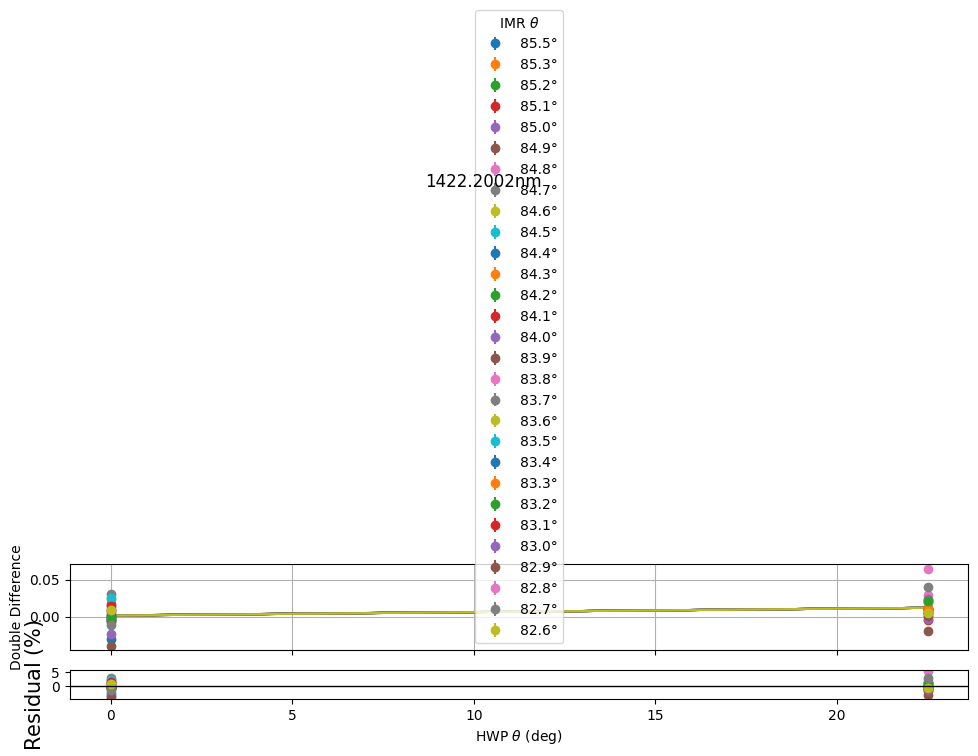

Updated Mueller Matrix:
[[ 0.49403876  0.47475975 -0.10828389 -0.04495204]
 [-0.48902239 -0.47962833  0.10940567  0.04540213]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -4.134492402114072 5.311603629475304
Error: [2.22022234e-03 5.35259678e+00]
s_res: 1.6394795099290413
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.0226e+04                                    7.79e+04    
       1              2         3.0206e+04      2.02e+01       4.11e-02       2.06e+03    
       2              3         3.0195e+04      1.12e+01       8.22e-02       2.01e+03    
       3              4         3.0173e+04      2.18e+01       1.64e-01       1.97e+03    
       4              5         3.0132e+04      4.09e+01       3.26e-01       3.69e+03    
       5              6         3.0061e+04      7.13e+01       6.45e-01       6.44e+03    
       

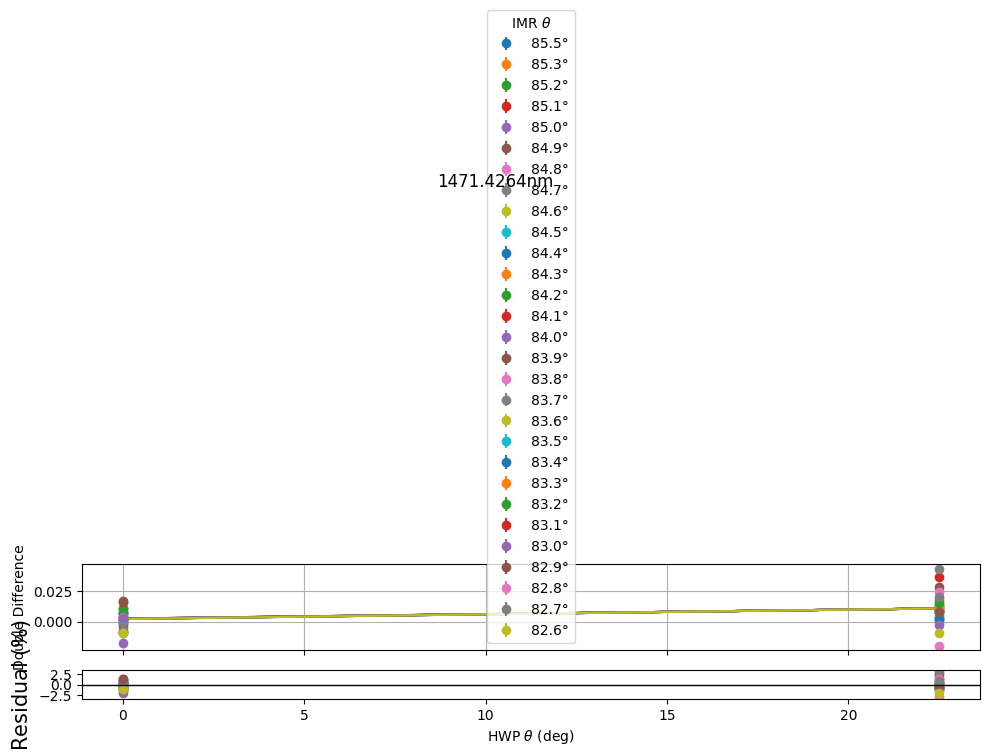

Updated Mueller Matrix:
[[ 0.494637    0.46734525 -0.13469927 -0.06385772]
 [-0.49054385 -0.47124228  0.13583734  0.06437911]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -3.037694849094523 3.217226086014331
Error: [1.66938567e-03 4.38395390e+00]
s_res: 1.098607373135266
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.1228e+04                                    2.15e+05    
       1              2         2.1107e+04      1.21e+02       3.98e-02       2.71e+03    
       2              3         2.1093e+04      1.44e+01       7.99e-02       2.66e+03    
       3              4         2.1064e+04      2.81e+01       1.59e-01       2.56e+03    
       4              5         2.1011e+04      5.35e+01       3.17e-01       4.66e+03    
       5              6         2.0915e+04      9.64e+01       6.27e-01       8.37e+03    
       6

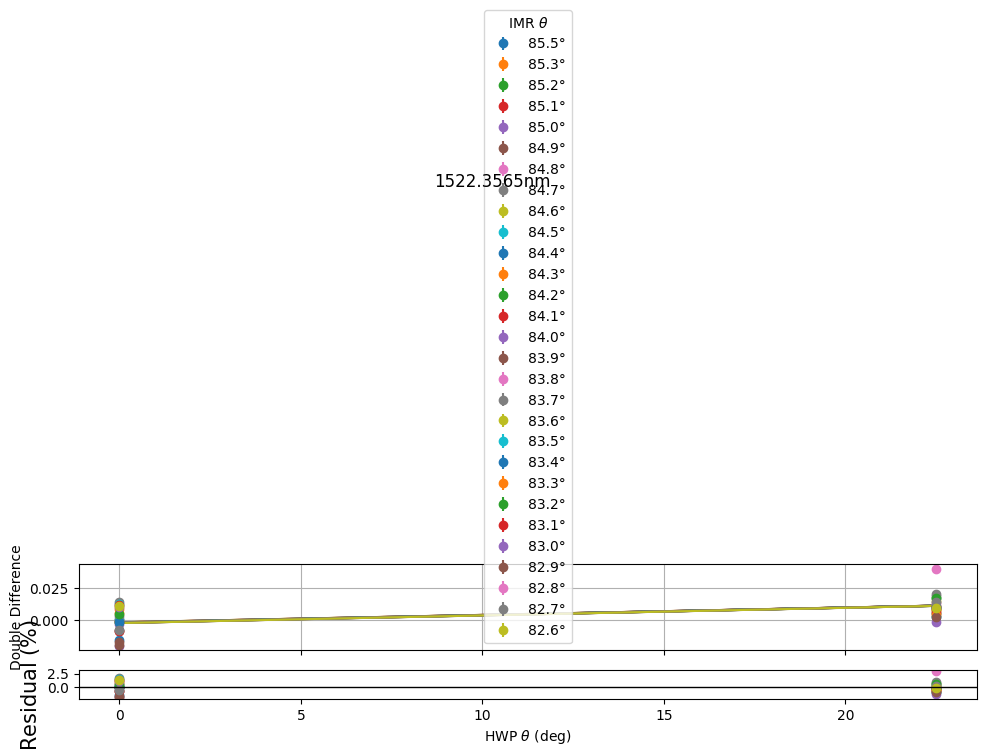

Updated Mueller Matrix:
[[ 0.49450636  0.45601333 -0.16368549 -0.07376281]
 [-0.49008367 -0.46013921  0.16513929  0.07441381]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -1.8176872344039978 2.8953292948504923
Error: [1.41248295e-03 3.46658168e+00]
s_res: 0.922159086128481
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.7942e+04                                    9.20e+04    
       1              2         1.7917e+04      2.47e+01       3.88e-02       7.83e+02    
       2              3         1.7913e+04      3.99e+00       7.76e-02       7.49e+02    
       3              4         1.7906e+04      7.50e+00       1.55e-01       7.08e+02    
       4              5         1.7893e+04      1.31e+01       3.08e-01       1.24e+03    
       5              6         1.7874e+04      1.88e+01       6.10e-01       1.78e+03    
      

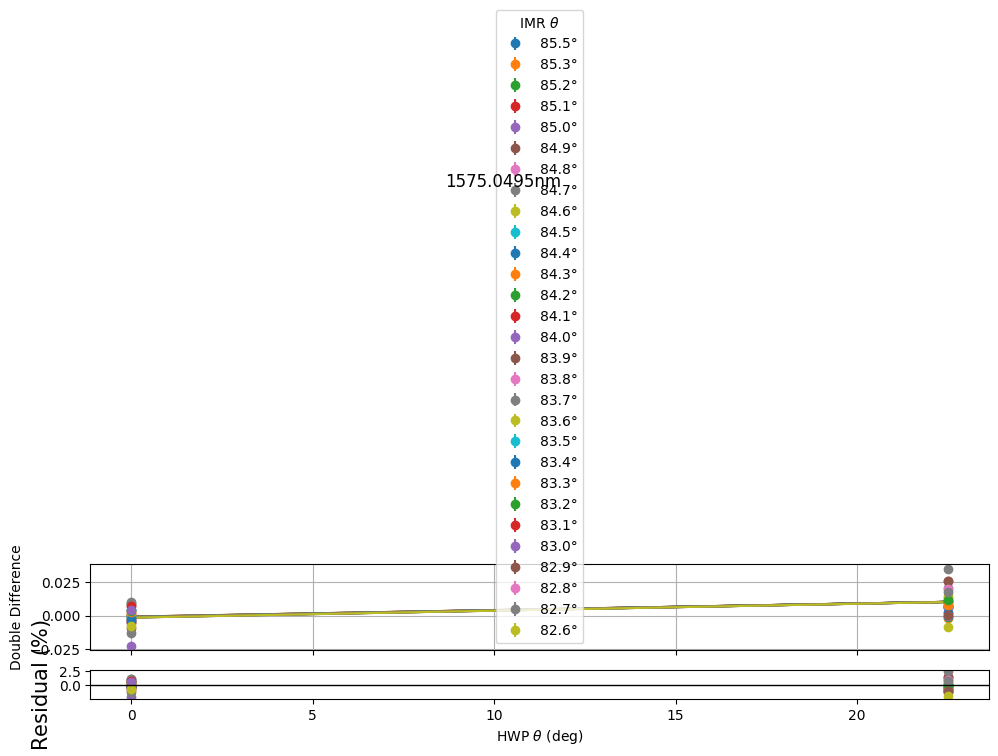

Updated Mueller Matrix:
[[ 0.49492568  0.44807906 -0.18751735 -0.07715186]
 [-0.49182313 -0.4509117   0.18868978  0.07762869]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -2.1433168760127645 2.465886942293092
Error: [1.37083289e-03 3.72839630e+00]
s_res: 0.8757781397106289
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2914e+04                                    2.33e+04    
       1              2         1.2908e+04      6.02e+00       3.78e-02       1.80e+03    
       2              3         1.2899e+04      8.99e+00       7.54e-02       1.76e+03    
       3              4         1.2881e+04      1.76e+01       1.51e-01       1.77e+03    
       4              5         1.2848e+04      3.35e+01       2.99e-01       3.37e+03    
       5              6         1.2787e+04      6.05e+01       5.93e-01       6.07e+03    
      

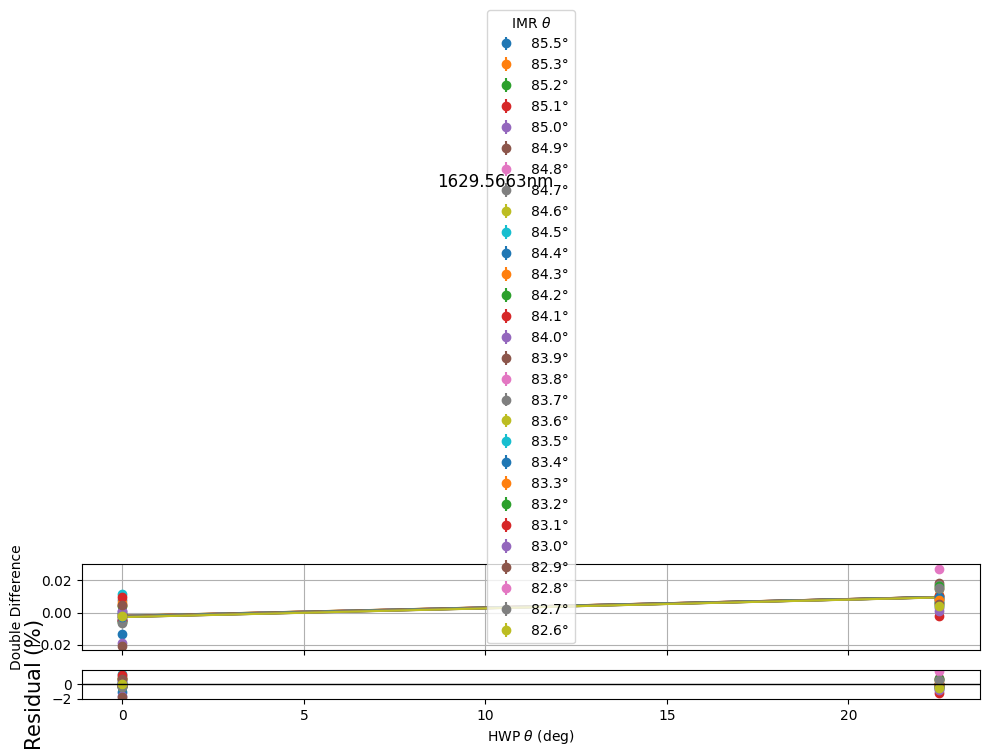

Updated Mueller Matrix:
[[ 0.49537019  0.43782702 -0.2102194  -0.07584856]
 [-0.49156653 -0.4412276   0.2118232   0.07642457]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -1.8318664452814324 1.7775025760215497
Error: [1.16210121e-03 3.27752579e+00]
s_res: 0.7226739689853453
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5025e+04                                    2.58e+05    
       1              2         1.4816e+04      2.09e+02       3.62e-02       8.93e+02    
       2              3         1.4811e+04      4.31e+00       7.33e-02       8.62e+02    
       3              4         1.4803e+04      8.21e+00       1.46e-01       8.01e+02    
       4              5         1.4788e+04      1.48e+01       2.91e-01       1.33e+03    
       5              6         1.4765e+04      2.32e+01       5.77e-01       2.08e+03    
     

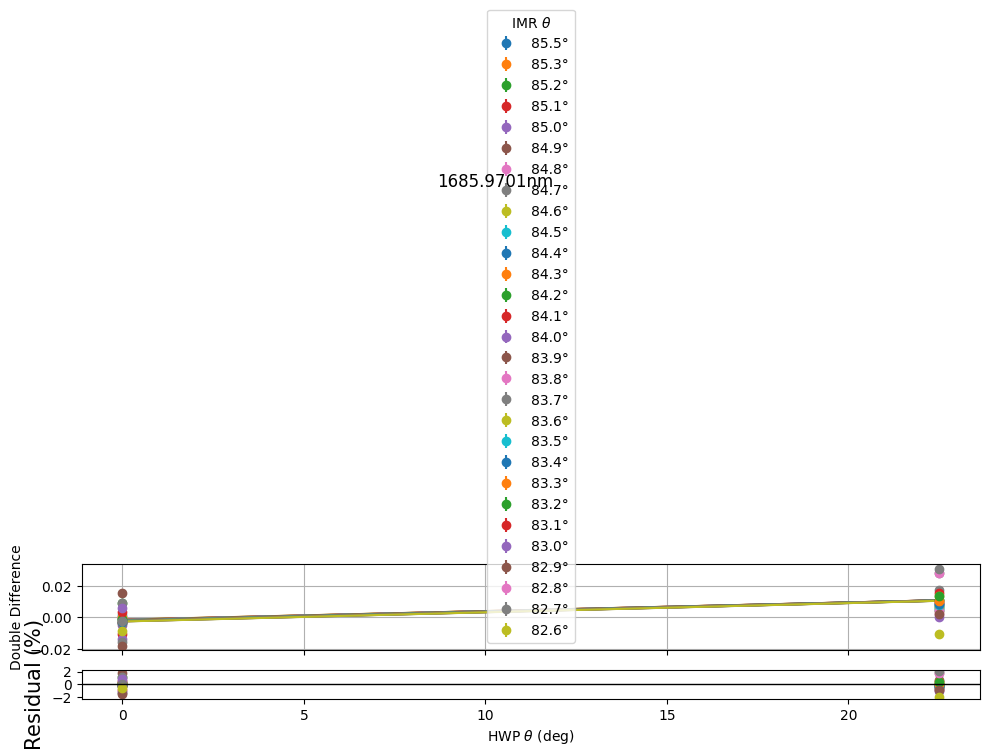

Updated Mueller Matrix:
[[ 0.49477728  0.42958315 -0.22722604 -0.07274006]
 [-0.49139031 -0.43255539  0.22877407  0.07323096]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -2.073489346455437 2.0229075686226636
Error: [1.34402595e-03 3.45665589e+00]
s_res: 0.8383199164747718
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         7.1273e+03                                    1.33e+05    
       1              2         7.0705e+03      5.68e+01       3.52e-02       9.70e+01    
       2              3         7.0702e+03      2.91e-01       7.06e-02       5.44e+01    
       3              4         7.0698e+03      3.84e-01       1.41e-01       4.56e+01    
       4              5         7.0697e+03      1.22e-01       1.35e-01       1.44e+01    
       5              6         7.0697e+03      1.13e-05       1.42e-03       2.89e-02    
`ftol`

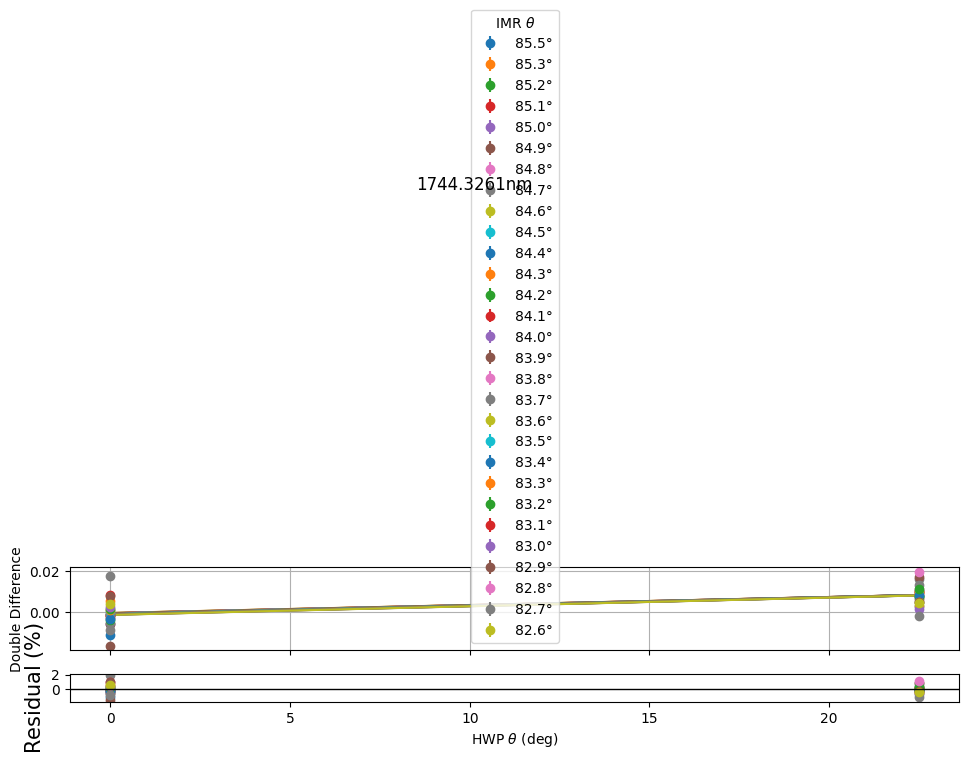

Updated Mueller Matrix:
[[ 0.49602567  0.42501949 -0.24068431 -0.07012505]
 [-0.49344505 -0.42724808  0.24193441  0.07048596]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -1.5618739708310363 1.8717041937351278
Error: [9.57097772e-04 3.27458055e+00]
s_res: 0.6010133715862065
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.1692e+04                                    2.91e+05    
       1              2         3.1306e+04      3.86e+02       3.29e-02       6.45e+02    
       2              3         3.1304e+04      2.21e+00       6.87e-02       4.77e+02    
       3              4         3.1300e+04      4.34e+00       1.37e-01       6.90e+02    
       4              5         3.1291e+04      8.36e+00       2.73e-01       1.33e+03    
       5              6         3.1276e+04      1.54e+01       5.40e-01       2.45e+03    
     

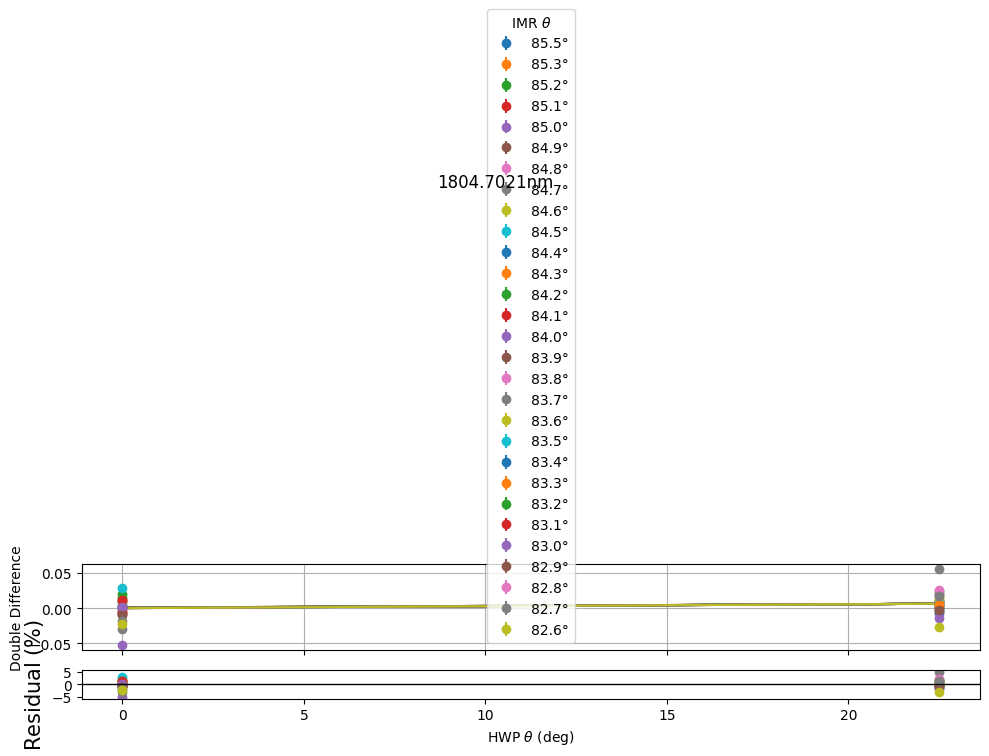

Updated Mueller Matrix:
[[ 0.49686496  0.41941401 -0.25113509 -0.06941129]
 [-0.49375588 -0.42205645  0.25271548  0.06984286]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -5.307143367182819 4.976444408258271
Error: [2.39100203e-03 1.07852049e+01]
s_res: 1.646681309423071
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.5195e+04                                    2.39e+05    
       1              2         3.4689e+04      5.06e+02       2.98e-02       1.30e+03    
       2              3         3.4683e+04      5.43e+00       6.73e-02       1.19e+03    
       3              4         3.4673e+04      1.07e+01       1.34e-01       1.16e+03    
       4              5         3.4652e+04      2.06e+01       2.67e-01       1.58e+03    
       5              6         3.4613e+04      3.87e+01       5.30e-01       2.96e+03    
       6

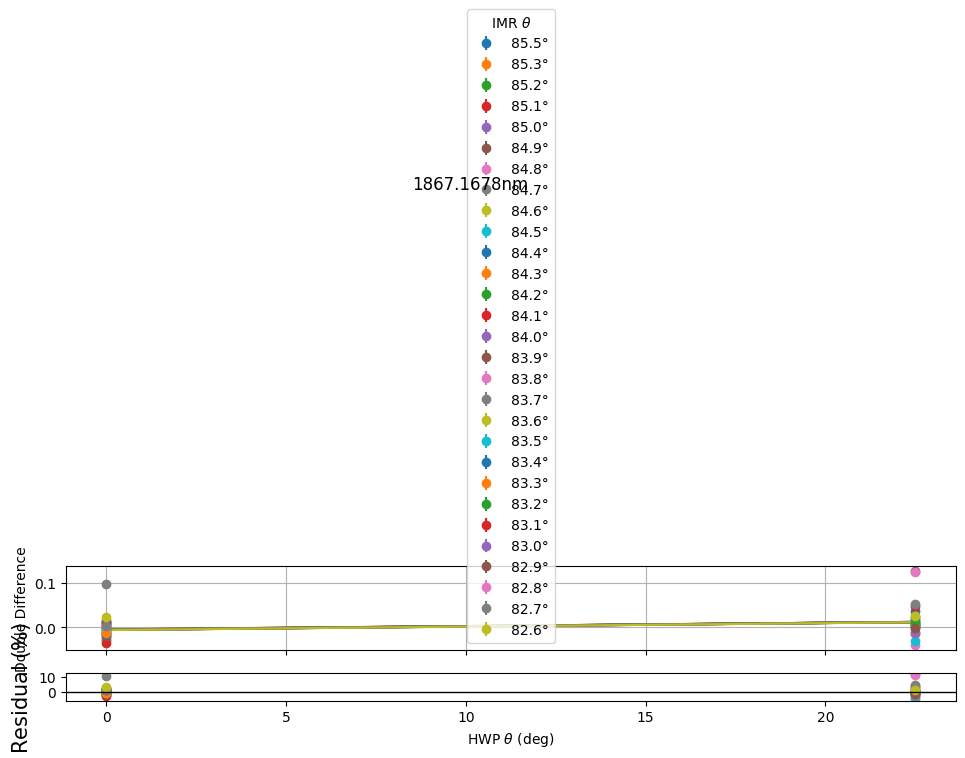

Updated Mueller Matrix:
[[ 0.49431452  0.41114583 -0.25994168 -0.06847234]
 [-0.49122184 -0.41375733  0.26154396  0.06889366]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -5.2197173316308465 11.518990139395232
Error: [3.48170027e-03 7.53934684e+00]
s_res: 3.3188695072427095
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.8871e+04                                    8.06e+04    
       1              2         1.8838e+04      3.30e+01       3.23e-02       1.10e+03    
       2              3         1.8834e+04      4.75e+00       6.49e-02       1.09e+03    
       3              4         1.8824e+04      9.40e+00       1.29e-01       1.22e+03    
       4              5         1.8806e+04      1.84e+01       2.58e-01       2.37e+03    
       5              6         1.8771e+04      3.50e+01       5.11e-01       4.51e+03    
     

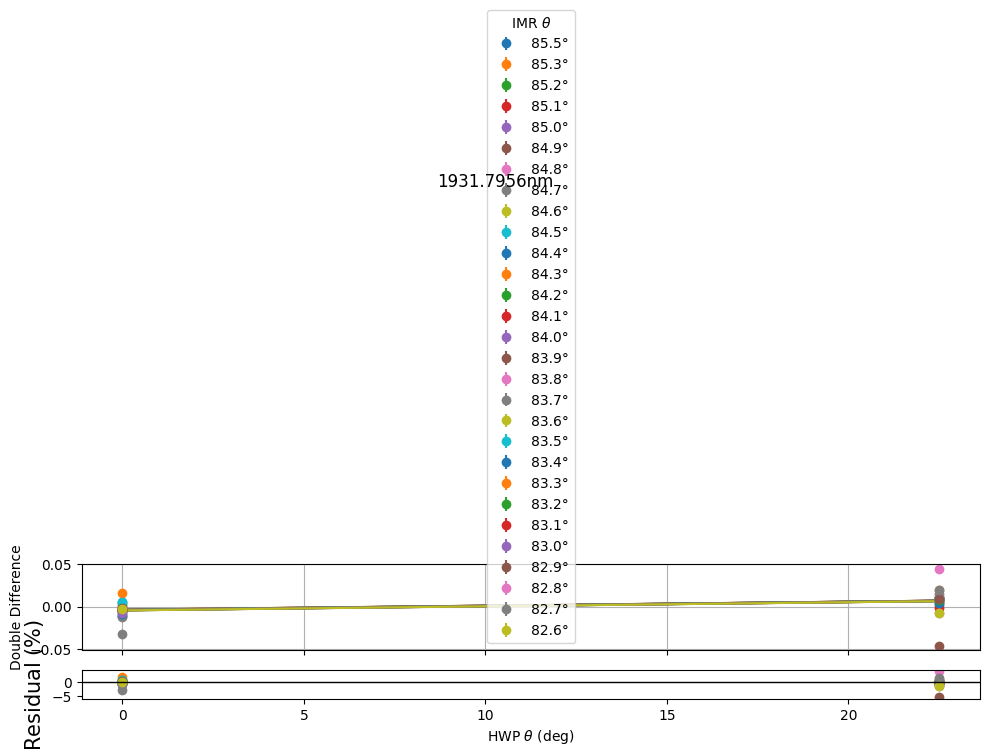

Updated Mueller Matrix:
[[ 0.49673656  0.41057173 -0.26343202 -0.07230052]
 [-0.49314588 -0.41357996  0.26532242  0.07282005]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -5.32917148710252 3.806324271143146
Error: [1.88470063e-03 6.59039031e+00]
s_res: 1.203079842055169
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.3347e+03                                    1.79e+04    
       1              2         9.3313e+03      3.44e+00       3.16e-02       8.93e+02    
       2              3         9.3275e+03      3.75e+00       6.31e-02       8.82e+02    
       3              4         9.3201e+03      7.39e+00       1.26e-01       9.14e+02    
       4              5         9.3058e+03      1.44e+01       2.51e-01       1.77e+03    
       5              6         9.2788e+03      2.70e+01       4.97e-01       3.33e+03    
       6 

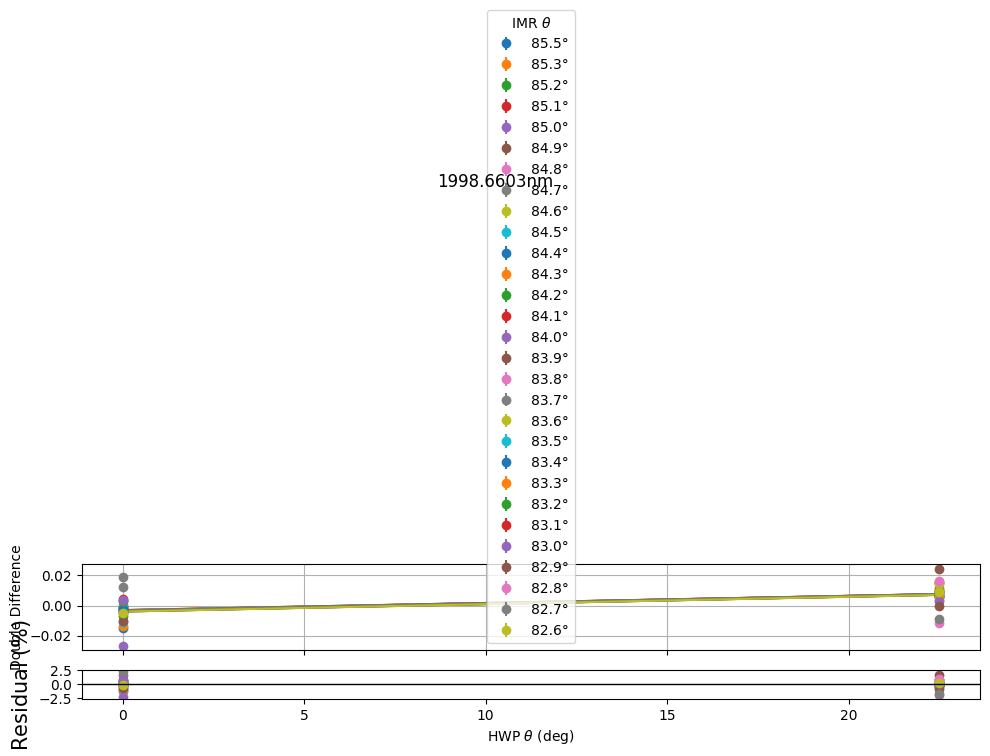

Updated Mueller Matrix:
[[ 0.49651264  0.40907888 -0.26583972 -0.07757129]
 [-0.49399751 -0.4111741   0.26717549  0.07796072]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -2.317484012537857 2.2750059763705774
Error: [1.34054968e-03 4.59912119e+00]
s_res: 0.8188261018170638
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         5.7540e+03                                    9.32e+04    
       1              2         5.7110e+03      4.30e+01       3.05e-02       4.14e+02    
       2              3         5.7093e+03      1.68e+00       6.13e-02       4.06e+02    
       3              4         5.7060e+03      3.29e+00       1.22e-01       4.63e+02    
       4              5         5.6997e+03      6.27e+00       2.44e-01       8.83e+02    
       5              6         5.6884e+03      1.14e+01       4.83e-01       1.60e+03    
      

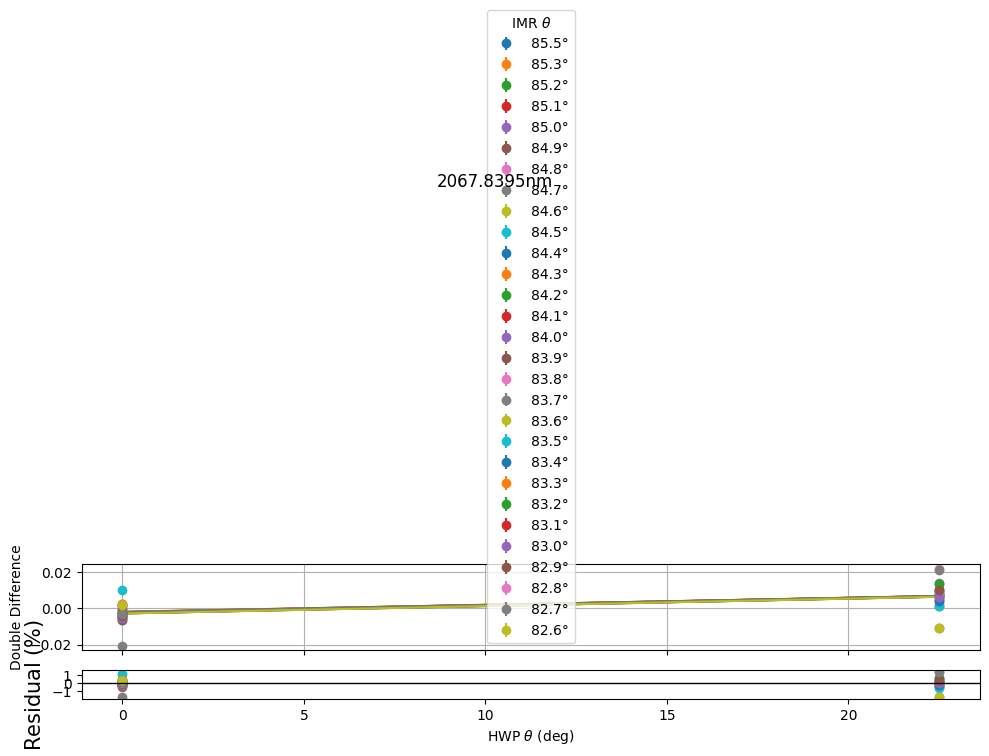

Updated Mueller Matrix:
[[ 0.49686249  0.40592468 -0.26478084 -0.08448625]
 [-0.49195692 -0.40999041  0.26739666  0.08531805]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -1.7978451690577257 1.5133503449830632
Error: [1.05524341e-03 4.20403029e+00]
s_res: 0.6316329379913739
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0711e+04                                    1.15e+05    
       1              2         1.0635e+04      7.57e+01       2.97e-02       1.96e+02    
       2              3         1.0635e+04      6.86e-01       6.01e-02       1.66e+02    
       3              4         1.0633e+04      1.27e+00       1.20e-01       1.49e+02    
       4              5         1.0631e+04      2.15e+00       2.39e-01       2.35e+02    
       5              6         1.0628e+04      2.73e+00       4.74e-01       2.98e+02    
     

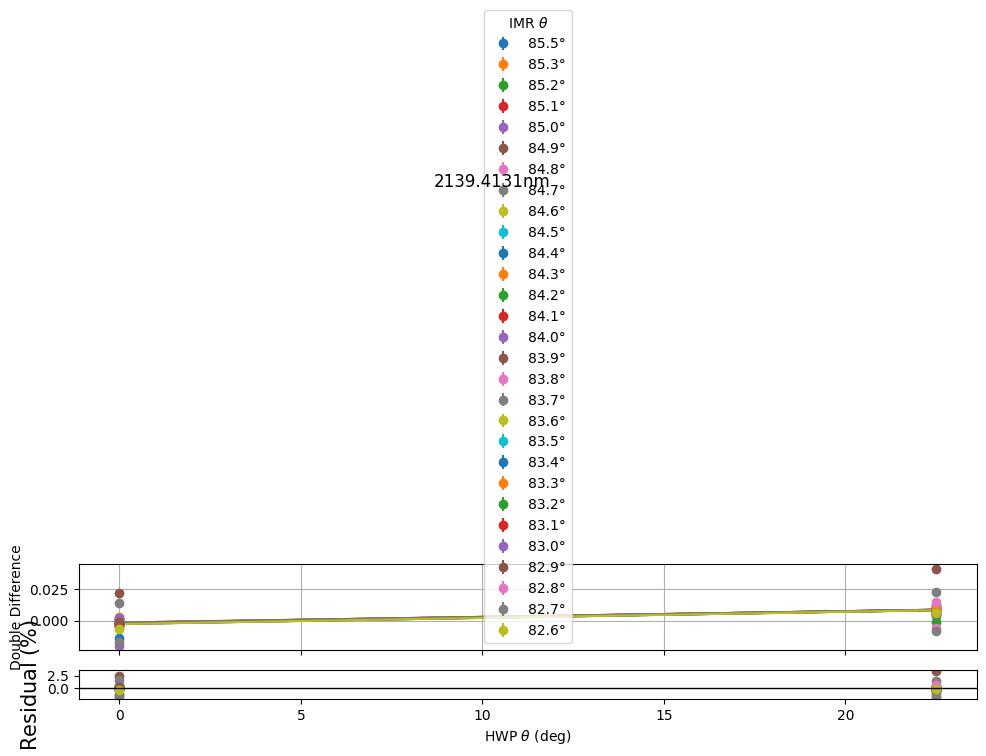

Updated Mueller Matrix:
[[ 0.49585033  0.40463086 -0.2617042  -0.09386982]
 [-0.49094471 -0.40869236  0.26429625  0.09479212]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -1.8109576660740232 3.3029358580379706
Error: [1.53816348e-03 4.84202520e+00]
s_res: 0.8842124268741824
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.3655e+04                                    3.70e+04    
       1              2         1.3646e+04      9.22e+00       2.92e-02       1.20e+02    
       2              3         1.3645e+04      4.58e-01       5.84e-02       1.14e+02    
       3              4         1.3644e+04      8.52e-01       1.16e-01       1.06e+02    
       4              5         1.3643e+04      1.45e+00       2.32e-01       1.80e+02    
       5              6         1.3641e+04      1.91e+00       4.61e-01       2.36e+02    
     

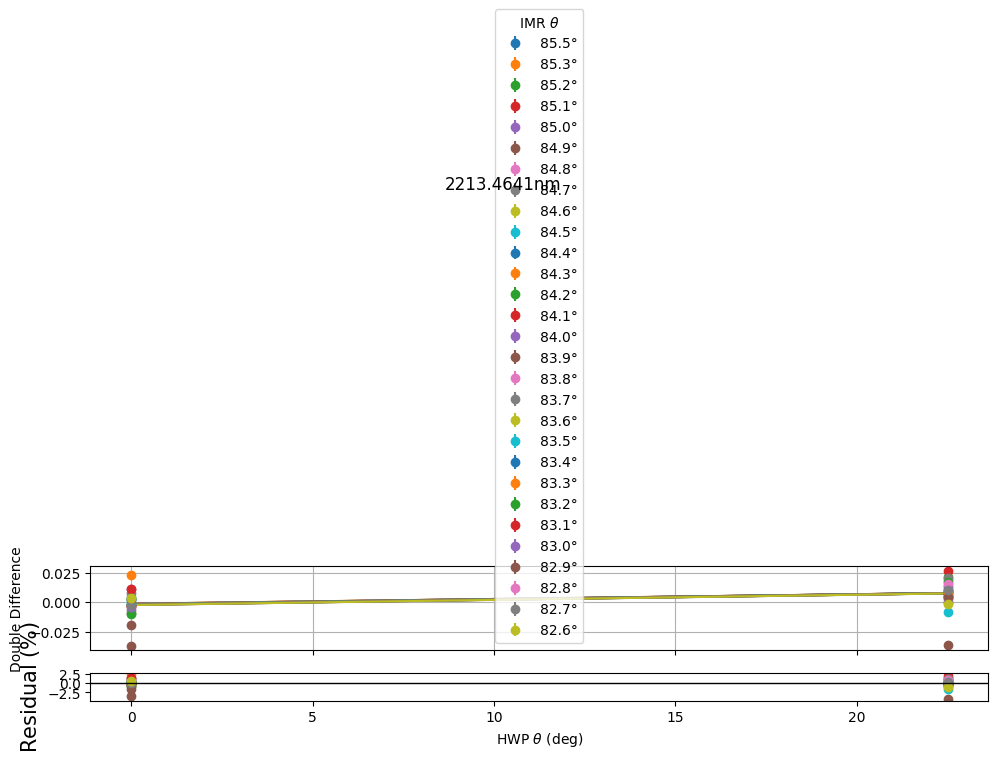

Updated Mueller Matrix:
[[ 0.49635276  0.40298607 -0.25630999 -0.1031723 ]
 [-0.48860725 -0.40940019  0.26034184  0.10478357]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -4.400661354704546 2.447569136118341
Error: [1.87900693e-03 6.69514025e+00]
s_res: 1.1504323015656042
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1419e+04                                    1.40e+05    
       1              2         1.1261e+04      1.58e+02       2.69e-02       9.17e+02    
       2              3         1.1257e+04      3.44e+00       5.63e-02       9.12e+02    
       3              4         1.1250e+04      6.88e+00       1.12e-01       1.35e+03    
       4              5         1.1237e+04      1.37e+01       2.24e-01       2.68e+03    
       5              6         1.1210e+04      2.71e+01       4.45e-01       5.26e+03    
       

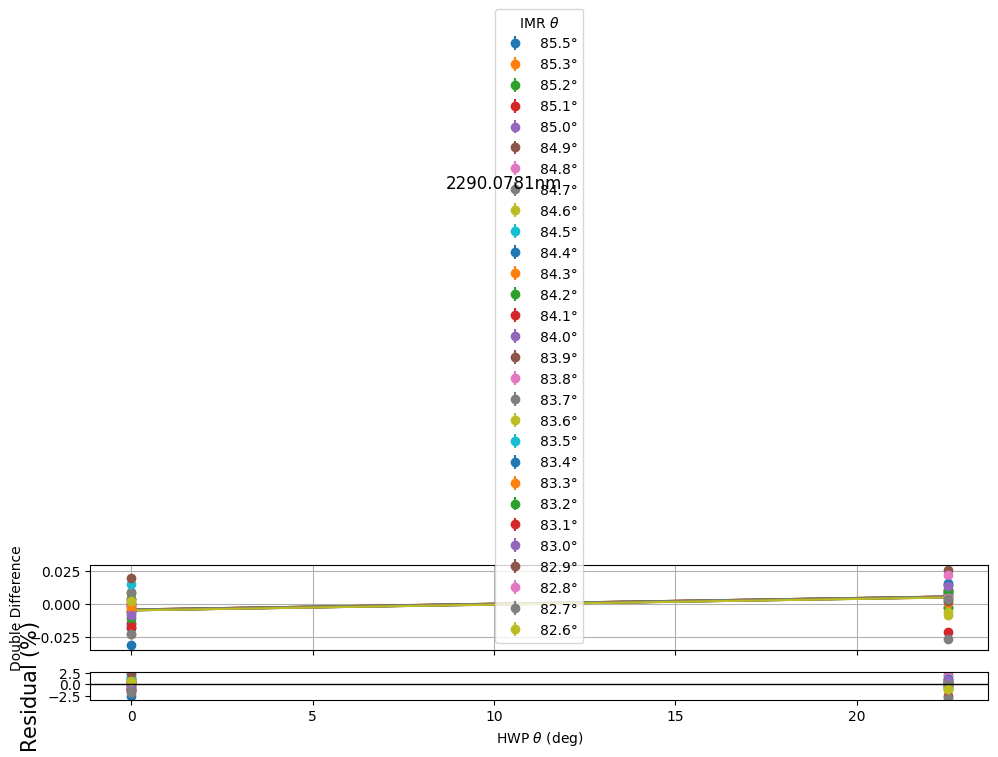

Updated Mueller Matrix:
[[ 0.4976035   0.40207298 -0.25042964 -0.1175524 ]
 [-0.48805327 -0.40999708  0.25524916  0.11983008]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -3.134865251989718 2.410773929440516
Error: [1.83946172e-03 7.38235523e+00]
s_res: 1.1911817289454758
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4915e+04                                    2.36e+05    
       1              2         3.4093e+04      8.23e+02       9.88e-03       2.39e+03    
       2              3         3.4088e+04      4.74e+00       5.52e-02       1.26e+03    
       3              4         3.4079e+04      9.23e+00       1.10e-01       1.24e+03    
       4              5         3.4061e+04      1.81e+01       2.19e-01       1.27e+03    
       5              6         3.4026e+04      3.50e+01       4.36e-01       2.45e+03    
       

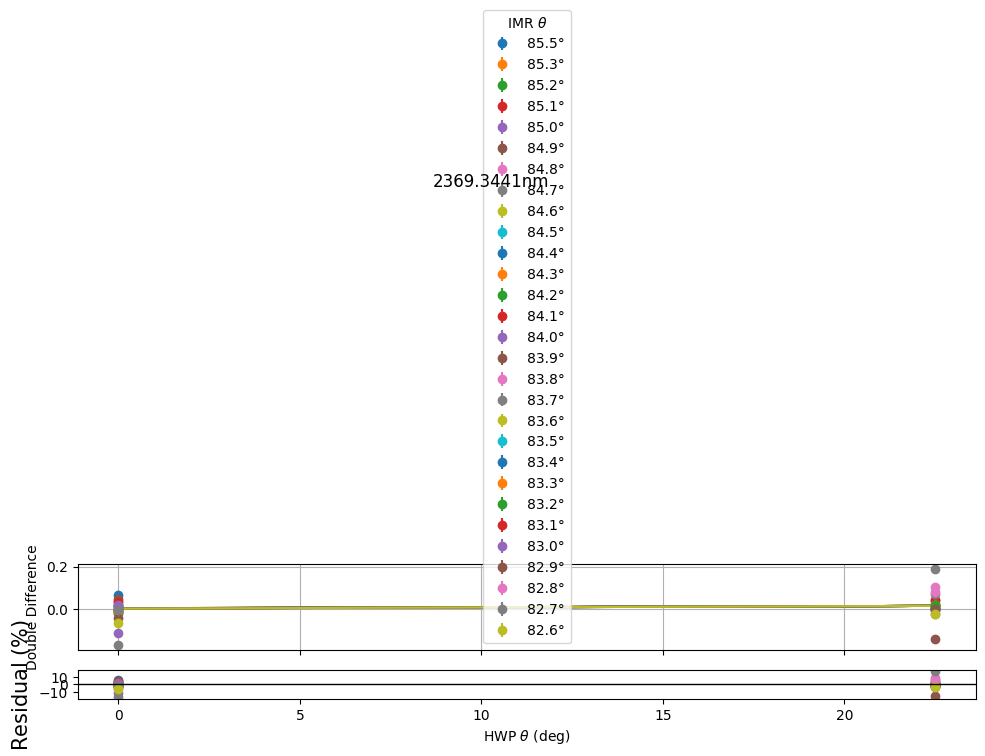

Updated Mueller Matrix:
[[ 0.49299171  0.39314889 -0.24373792 -0.11244418]
 [-0.47604379 -0.40714596  0.25246756  0.11633095]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
204 102
Residuals range: -17.428606376209906 17.58230685483697
Error: [4.43860856e-03 8.63976252e+00]
s_res: 5.368085913576003


In [29]:
# all bins
sres_list = []
error_list = []
for bin in range(22):
    fp = f'datacsvs/onsky_csvs/HD25532/bin{bin}.csv'
    error,fig, ax,sres = fit_CHARIS_Mueller_matrix_by_bin_m3(Path(fp), bin, 
        Path(f'/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_w_offset/bin{bin}.json'),
        )
    sres_list.append(sres)
    error_list.append(error)

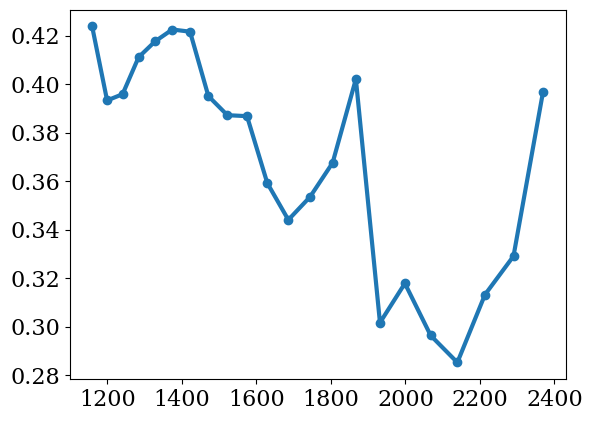

In [ ]:
# 2 stars
plt.plot(wavelength_bins,sres_list,'o-')

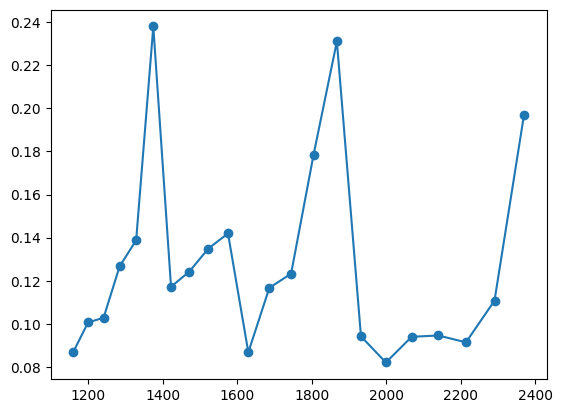

In [ ]:
# 1 star w delta theta
plt.plot(wavelength_bins,sres_list,'o-')

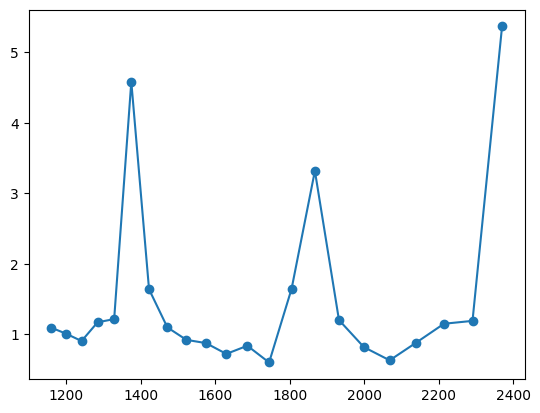

In [30]:
# noisy star delta theta
plt.plot(wavelength_bins,sres_list,'o-')

In [18]:
from vampires_calibration.csv_tools import model_data
jsondir = '/Users/thomasmcintosh/Desktop/CHARIS-REU/Fitting/naive_fitting/m3_diat_less_stars'
df = model_data(Path(jsondir))
df

,wavelength_bin,M3_delta_theta,M3_epsilon
0,1159.5614,7.817694,0.015555
1,1199.6971,8.605196,0.014806
2,1241.2219,8.337586,0.014518
3,1284.1840,9.114570,0.013981
4,1328.6331,9.943145,0.013462
5,1374.6208,10.197415,0.012027
6,1422.2002,9.005272,0.012782
7,1471.4264,10.884304,0.011623
8,1522.3565,11.218486,0.011136
9,1575.0495,10.907272,0.011293


In [15]:
errors=np.array(error_list)
errors1 = np.mean(errors[:,0])
errors2 = np.mean(errors[:,1])
print(errors1,errors2)

0.00017862185505378422 0.4783276155760076


In [17]:
# refine model
def phys_model_chisq(p0, wavelengths, diat_m3,errors_m3):
    """
    Calculate the chi squared for the physical model of CHARIS.
    
    Parameters:
    -----------
    p0 : list
        List of parameters [m1,b1,m2,b2].
    
    wavelengths : numpy array
        Array of wavelengths that are in the data.

    diat_m3 : float
        Diattenuation of the M3 mirror at the given wavelengths.
    
    errors_m3 : numpy array
        Array of errors for the M3 diattenuation.

    Returns:
    --------
    float
        The chi squared value.
    """
    # Get model diat
    model_diat = M3_diattenuation(wavelengths, p0[0],p0[1],p0[2],p0[3])

    # Calculate residual

    residuals_m3 = (model_diat - diat_m3) / errors_m3

    # Calculate chisq
    chisq_m3 = np.sum(residuals_m3**2)
    return chisq_m3


In [21]:
from scipy.optimize import minimize
from vampires_calibration.fitting import update_p0
# define bounds
p0 = [2.104,14.2,2.1,13.2]
m1_b = (0.8*p0[0],1.2*p0[0])
b1_b = (0.8*p0[1],1.2*p0[1])
m2_b = (0.8*p0[2],1.2*p0[2])    
b2_b = (0.8*p0[3],1.2*p0[3])
m3_diat = df['M3_epsilon'].values
bounds = [m1_b, b1_b, m2_b, b2_b]

# iterative fitting
iteration = 1
previous_chisq = 1000000
new_chisq = 0

while abs(previous_chisq-new_chisq)> 0.01*abs(previous_chisq):
        previous_chisq = new_chisq
        result = minimize(phys_model_chisq,p0, args=(wavelength_bins,m3_diat,errors1), bounds=bounds)
        p0 = result.x
        new_chisq = result.fun
        iteration += 1
        print(result)

# get error from covariance matrix
covariance_matrix = result.hess_inv.todense()
errors_phys = np.sqrt(np.diag(covariance_matrix))
print("Final Parameters:")
print(p0)
print("Final Errors:")
print(errors_phys)





  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 137.2782767605274
        x: [ 1.807e+00  1.373e+01  1.793e+00  1.374e+01]
      nit: 149
      jac: [ 1.968e-01 -1.533e-01 -8.870e-02 -1.309e-01]
     nfev: 1010
     njev: 202
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 137.27827675641066
        x: [ 1.807e+00  1.373e+01  1.793e+00  1.374e+01]
      nit: 1
      jac: [-2.618e-01 -6.982e-02  5.718e-02 -1.528e-01]
     nfev: 15
     njev: 3
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
Final Parameters:
[ 1.80661155 13.73356836  1.79301933 13.73786266]
Final Errors:
[1. 1. 1. 1.]
